In [1]:
import numpy as np
import matplotlib.pyplot as plt

from simulator import *

In [2]:
sample_size = 8000
catalog_size = 100
num_caches = 3
num_dest = 4
relative_cache_size = 0.3 / num_caches
cache_sizes = np.ones(num_caches, dtype=int)*int(relative_cache_size*catalog_size)

In [3]:
irm_trace, sample_size, sample_size = parse_trace(load_mat_array("./traces/femto_trace/femto_irm_trace.mat"))
destinations = load_mat_array("./traces/femto_trace/femto_dest_trace.mat")['marking']-1

In [4]:
# Generate Utilities and caches
utilities = np.array([
    [1, 2, 100],
    [1, 2, 100],
    [1, 2, 100],
    [1, 2, 100]
])
edges = np.array([
    [1, 1, 0],
    [1, 1, 0],
    [0, 1, 1],
    [0, 1, 1]
]) # destinations x caches

In [5]:
caches_init = np.array([
    [22,    70,    59,    72,    55,    94,    38,    77,    48,    43],
    [12,     1,    81,    95,     6,    42,    39,     7,    65,    50],
    [62,    19,    25,    29,    36,    68,    20,    22,    83,     4]
])-1

In [6]:
# Initialize caches
cache_mLRU = mLRU(cache_size=cache_sizes, catalog_size=catalog_size, caches_init=caches_init, utilities=utilities, edges=edges)
cache_LazyLRU = LazyLRU(cache_size=cache_sizes, catalog_size=catalog_size, caches_init=caches_init, utilities=utilities, edges=edges)
cache_BSA = BSA(cache_sizes, catalog_size, sample_size, utilities, edges)

In [7]:
for request, dest in zip(irm_trace, destinations):
    cache_mLRU.request(request, dest)
    cache_LazyLRU.request(request, dest)
    cache_BSA.request(request, dest)

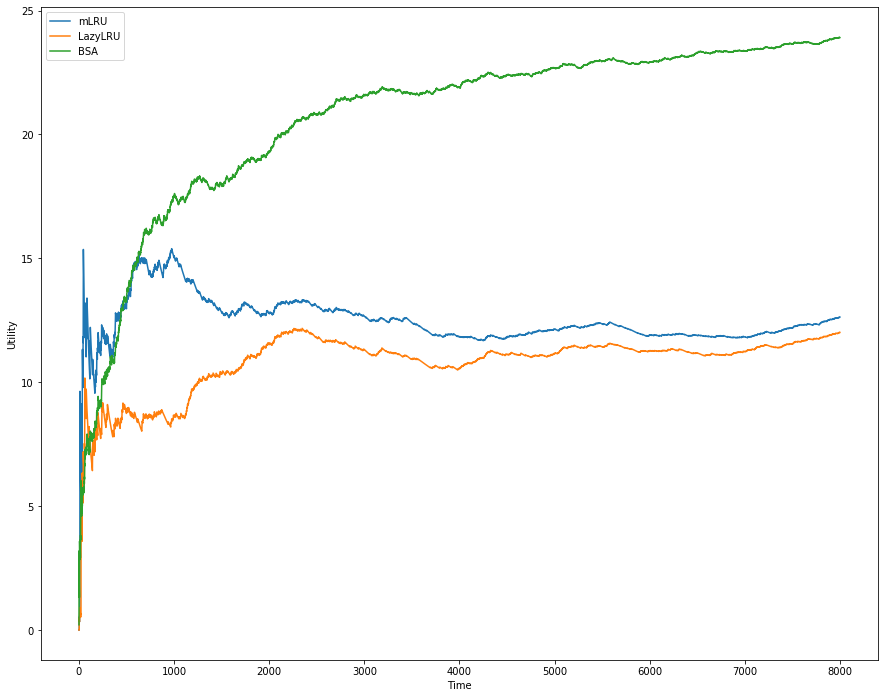

In [36]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 12]
plt.plot(cache_mLRU.get_hitrate())
plt.plot(cache_LazyLRU.get_hitrate())
plt.plot(cache_BSA.get_hitrate())
plt.ylabel("Utility")
plt.xlabel("Time")
plt.legend(["mLRU", "LazyLRU", "BSA"])

In [10]:
matlab_LazyLRU_hits = load_mat_array(r"./traces/femto_trace/femto_LazyLRU_hits.mat")['hit_LRU']
np.array(cache_LazyLRU.hits)
# matlab_LazyLRU_hits

for i, (request, arr_py, arr_mat) in enumerate(zip(irm_trace, matlab_LazyLRU_hits, np.array(cache_LazyLRU.hits, dtype=np.uint8))):
#     print(request, arr_py, arr_mat)
#     print(i, request)
    if np.sum(arr_py-arr_mat) > 0:
        print("Different!!")
        print("\t", arr_py, arr_mat)

# matlab_LazyLRU_hits




Different!!
	 [0 0 0 0] [0 0 0 2]
Different!!
	 [2 0 0 0] [0 0 0 0]
Different!!
	 [  0   0   0 100] [0 0 0 0]
Different!!
	 [0 0 0 0] [0 1 0 0]
Different!!
	 [2 0 0 0] [0 0 0 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [  0   0 100   0] [0 0 0 0]
Different!!
	 [1 0 0 0] [0 0 0 0]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [0 0 0 0] [0 0 0 2]
Different!!
	 [2 0 0 0] [0 0 0 0]
Different!!
	 [0 1 0 0] [0 2 0 0]
Different!!
	 [0 0 0 0] [  0   0 100   0]
Different!!
	 [2 0 0 0] [0 0 0 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [2 0 0 0] [0 0 0 0]
Different!!
	 [2 0 0 0] [0 0 0 0]
Different!!
	 [0 2 0 0] [0 0 0 0]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [0 1 0 0] [0 2 0 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!


Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 0 0] [0 2 0 0]
Different!!
	 [  0   0   0 100] [0 0 0 0]
Different!!
	 [0 0 0 0] [0 0 0 2]
Different!!
	 [0 2 0 0] [0 1 0 0]
Different!!
	 [0 0 0 0] [2 0 0 0]
Different!!
	 [0 1 0 0] [0 2 0 0]
Different!!
	 [2 0 0 0] [1 0 0 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 0 0] [1 0 0 0]
Different!!
	 [2 0 0 0] [1 0 0 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 1 0 0] [0 2 0 0]
Different!!
	 [1 0 0 0] [2 0 0 0]
Different!!
	 [0 0 0 0] [0 0 2 0]
Different!!
	 [0 2 0 0] [0 1 0 0]
Different!!
	 [0 0 0 2] [0 0 0 0]
Different!!
	 [2 0 0 0] [1 0 0 0]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [0 0 0 0] [0 0 0 2]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [0 2 0 0] [0 0 0 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 0 0] [  0   0   0 100]
Different!!
	 [0 0 0 0] [0 0 2 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 2 0 0] [0 1 0 0]
Different!

	 [0 2 0 0] [0 1 0 0]
Different!!
	 [0 2 0 0] [0 0 0 0]
Different!!
	 [1 0 0 0] [2 0 0 0]
Different!!
	 [  0   0 100   0] [0 0 0 0]
Different!!
	 [  0   0   0 100] [0 0 0 0]
Different!!
	 [  0   0 100   0] [0 0 0 0]
Different!!
	 [0 2 0 0] [0 0 0 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 0 0] [  0   0   0 100]
Different!!
	 [0 0 0 0] [0 0 2 0]
Different!!
	 [0 0 0 0] [0 1 0 0]
Different!!
	 [  0   0   0 100] [0 0 0 0]
Different!!
	 [2 0 0 0] [1 0 0 0]
Different!!
	 [  0   0 100   0] [0 0 0 0]
Different!!
	 [  0   0 100   0] [0 0 0 0]
Different!!
	 [0 2 0 0] [0 0 0 0]
Different!!
	 [0 2 0 0] [0 1 0 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [  0   0 100   0] [0 0 0 0]
Different!!
	 [0 0 0 2] [0 0 0 0]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [  0   0   0 100] [0 0 0 0]
Different!!
	 [  0   0   0 100] [0 0 0 0]
Different!!
	 [0 0 0 0] [  0   0   0 100]
Different!!
	 [  0   0   0 100] [0 0 0 2]
Different!!
	 [0 2 0 0] [0 1 0 0]
Differen

	 [2 0 0 0] [1 0 0 0]
Different!!
	 [0 0 0 0] [  0   0   0 100]
Different!!
	 [1 0 0 0] [2 0 0 0]
Different!!
	 [2 0 0 0] [1 0 0 0]
Different!!
	 [0 0 0 0] [  0   0 100   0]
Different!!
	 [0 2 0 0] [0 0 0 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 0 0] [  0   0 100   0]
Different!!
	 [0 0 0 2] [0 0 0 0]
Different!!
	 [0 2 0 0] [0 0 0 0]
Different!!
	 [0 0 0 0] [  0   0 100   0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 0 0] [  0   0 100   0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 2 0 0] [0 0 0 0]
Different!!
	 [0 2 0 0] [0 0 0 0]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [0 0 0 0] [0 2 0 0]
Different!!
	 [0 0 0 0] [1 0 0 0]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [  0   0 100   0] [0 0 0 0]
Different!!
	 [0 0 0 0] [0 0 2 0]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [0 0 0 0] [1 0 0 0]
Different!!
	 [2 0 0 0] [0 0 0 0]
Different!!
	 [0 0 0 0] [  0   0 100   0]
Different!!
	 [  0   0 1

	 [0 2 0 0] [0 0 0 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [2 0 0 0] [1 0 0 0]
Different!!
	 [2 0 0 0] [0 0 0 0]
Different!!
	 [0 0 0 0] [  0   0   0 100]
Different!!
	 [2 0 0 0] [1 0 0 0]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [0 0 0 0] [0 0 2 0]
Different!!
	 [0 2 0 0] [0 0 0 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 0 0] [0 0 2 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 0 0] [0 1 0 0]
Different!!
	 [0 2 0 0] [0 1 0 0]
Different!!
	 [0 2 0 0] [0 0 0 0]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [  0   0 100   0] [0 0 0 0]
Different!!
	 [  0   0 100   0] [0 0 0 0]
Different!!
	 [0 0 0 2] [  0   0   0 100]


Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 0 0] [0 2 0 0]
Different!!
	 [  0   0   0 100] [0 0 0 2]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [2 0 0 0] [0 0 0 0]
Different!!
	 [  0   0 100   0] [0 0 0 0]
Different!!
	 [2 0 0 0] [1 0 0 0]
Different!!
	 [2 0 0 0] [0 0 0 0]
Different!!
	 [0 1 0 0] [0 2 0 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [2 0 0 0] [1 0 0 0]
Different!!
	 [  0   0   0 100] [0 0 0 2]
Different!!
	 [2 0 0 0] [1 0 0 0]
Different!!
	 [0 0 0 0] [0 0 0 2]
Different!!
	 [0 0 0 0] [  0   0   0 100]
Different!!
	 [0 0 0 0] [  0   0   0 100]
Different!!
	 [0 1 0 0] [0 2 0 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 1 0 0] [0 2 0 0]
Different!!
	 [2 0 0 0] [1 0 0 0]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 0 0] [  0   0 100   0]
Different!!
	 [0 0 0 0] [0 0 0 2]
Different!!
	 [0 0 2 0] [  0   0 100   0]
Different!!
	 [0 0 0 2] [  0   0   0 100]
Different!!
	 [2 0 0 0] [1 0 0 0]
Different!!


In [11]:
matlab_mLRU_hits = load_mat_array(r"./traces/femto_trace/femto_mLRU_hits.mat")['hit_mLRU']
# np.array(cache_LazyLRU.hits)
# matlab_LazyLRU_hits

for i, (request, arr_py, arr_mat) in enumerate(zip(irm_trace, matlab_mLRU_hits, np.array(cache_mLRU.hits, dtype=np.uint8))):
#     print(request, arr_py, arr_mat)
    print(i, request)
    if np.sum(arr_py-arr_mat) > 0:
        print("Different!!")
        print("\t", arr_py, arr_mat)

# matlab_LazyLRU_hits


0 31
1 97
2 1
3 0
4 4
5 26
6 0
7 4
8 0
9 40
10 4
11 27
12 9
13 89
14 50
15 17
16 13
17 98
18 2
19 0
20 0
21 77
22 89
23 9
24 3
25 30
26 0
27 35
28 23
29 1
30 23
31 69
32 1
33 68
34 3
35 27
36 2
37 10
38 1
39 8
40 7
41 5
42 41
43 9
44 30
45 41
46 4
47 68
48 28
49 65
50 6
51 8
52 67
53 19
54 11
55 1
56 80
57 13
58 35
59 1
60 6
61 5
62 10
63 0
64 24
65 0
66 1
67 31
68 76
69 17
70 5
71 54
72 97
73 2
74 5
75 26
76 4
77 0
78 4
79 9
80 0
81 70
82 30
83 37
84 0
85 0
86 2
87 0
88 1
89 24
90 8
91 76
92 15
93 1
94 1
95 3
96 6
97 0
98 19
99 0
100 30
101 22
102 0
103 36
104 3
105 38
106 3
107 15
108 1
109 52
110 2
111 33
112 13
113 65
114 12
115 0
116 0
117 83
118 7
119 0
120 23
121 18
122 12
123 67
124 65
125 2
126 29
127 9
128 2
129 0
130 1
131 20
132 2
133 7
134 4
135 9
136 21
137 81
138 0
139 13
140 20
141 1
142 30
143 5
144 10
145 14
146 52
147 27
148 19
149 0
150 0
151 11
152 39
153 27
154 1
155 2
156 1
157 5
158 21
159 2
160 2
161 39
162 53
163 12
164 30
165 6
166 46
167 47
168 0
169 31
170 

2316 2
2317 56
2318 62
2319 27
2320 7
2321 30
2322 1
2323 35
2324 34
2325 12
2326 78
2327 14
2328 8
2329 33
2330 50
2331 4
2332 11
2333 2
2334 1
2335 37
2336 4
2337 1
2338 93
2339 7
2340 0
2341 28
2342 0
2343 14
2344 21
2345 14
2346 11
2347 10
2348 1
2349 21
2350 0
2351 0
2352 1
2353 26
2354 1
2355 9
2356 0
2357 85
2358 2
2359 47
2360 59
2361 4
2362 49
2363 5
2364 1
2365 49
2366 2
2367 19
2368 16
2369 56
2370 0
2371 3
2372 24
2373 4
2374 14
2375 0
2376 7
2377 0
2378 78
2379 45
2380 0
2381 12
2382 0
2383 40
2384 20
2385 50
2386 1
2387 5
2388 29
2389 26
2390 9
2391 2
2392 23
2393 95
2394 0
2395 12
2396 10
2397 30
2398 75
2399 2
2400 3
2401 31
2402 78
2403 17
2404 53
2405 1
2406 30
2407 18
2408 23
2409 0
2410 67
2411 15
2412 3
2413 21
2414 4
2415 0
2416 2
2417 9
2418 32
2419 2
2420 11
2421 80
2422 0
2423 0
2424 5
2425 1
2426 20
2427 1
2428 18
2429 57
2430 0
2431 10
2432 0
2433 27
2434 1
2435 19
2436 0
2437 81
2438 6
2439 0
2440 24
2441 62
2442 2
2443 6
2444 56
2445 33
2446 5
2447 3
2448 0

3465 0
3466 77
3467 8
3468 82
3469 21
3470 92
3471 0
3472 39
3473 54
3474 1
3475 35
3476 0
3477 12
3478 5
3479 3
3480 53
3481 60
3482 22
3483 6
3484 0
3485 2
3486 73
3487 7
3488 8
3489 44
3490 1
3491 20
3492 77
3493 8
3494 40
3495 4
3496 9
3497 63
3498 1
3499 96
3500 0
3501 40
3502 50
3503 24
3504 85
3505 8
3506 29
3507 24
3508 0
3509 66
3510 35
3511 74
3512 18
3513 0
3514 19
3515 3
3516 16
3517 20
3518 4
3519 28
3520 1
3521 27
3522 17
3523 1
3524 60
3525 4
3526 85
3527 3
3528 2
3529 3
3530 66
3531 1
3532 0
3533 23
3534 37
3535 16
3536 45
3537 14
3538 5
3539 0
3540 10
3541 37
3542 0
3543 39
3544 19
3545 1
3546 1
3547 29
3548 44
3549 0
3550 97
3551 34
3552 13
3553 2
3554 4
3555 6
3556 4
3557 9
3558 24
3559 71
3560 41
3561 8
3562 27
3563 77
3564 72
3565 16
3566 82
3567 26
3568 41
3569 14
3570 14
3571 41
3572 94
3573 0
3574 7
3575 0
3576 69
3577 14
3578 0
3579 3
3580 3
3581 93
3582 4
3583 17
3584 0
3585 7
3586 4
3587 3
3588 0
3589 94
3590 2
3591 35
3592 9
3593 0
3594 0
3595 1
3596 2
3597 

4671 1
4672 1
4673 45
4674 11
4675 0
4676 2
4677 42
4678 9
4679 8
4680 3
4681 32
4682 0
4683 4
4684 6
4685 0
4686 2
4687 23
4688 69
4689 20
4690 12
4691 0
4692 4
4693 1
4694 0
4695 0
4696 1
4697 14
4698 70
4699 21
4700 0
4701 14
4702 39
4703 6
4704 15
4705 0
4706 0
4707 0
4708 1
4709 84
4710 76
4711 24
4712 84
4713 95
4714 6
4715 10
4716 54
4717 55
4718 7
4719 1
4720 23
4721 10
4722 6
4723 1
4724 0
4725 6
4726 0
4727 87
4728 50
4729 46
4730 9
4731 93
4732 1
4733 76
4734 33
4735 23
4736 0
4737 93
4738 20
4739 2
4740 2
4741 4
4742 0
4743 57
4744 86
4745 99
4746 33
4747 0
4748 15
4749 27
4750 4
4751 1
4752 36
4753 15
4754 50
4755 4
4756 5
4757 10
4758 4
4759 46
4760 51
4761 3
4762 1
4763 39
4764 0
4765 3
4766 6
4767 0
4768 0
4769 29
4770 36
4771 2
4772 9
4773 59
4774 3
4775 1
4776 16
4777 0
4778 0
4779 5
4780 3
4781 14
4782 0
4783 46
4784 23
4785 0
4786 3
4787 3
4788 20
4789 3
4790 1
4791 3
4792 3
4793 12
4794 86
4795 19
4796 3
4797 3
4798 0
4799 0
4800 1
4801 4
4802 62
4803 46
4804 7
480

5840 35
5841 0
5842 0
5843 0
5844 0
5845 59
5846 4
5847 57
5848 5
5849 55
5850 14
5851 36
5852 1
5853 23
5854 0
5855 51
5856 0
5857 4
5858 1
5859 29
5860 14
5861 28
5862 6
5863 13
5864 91
5865 18
5866 40
5867 38
5868 0
5869 44
5870 13
5871 86
5872 10
5873 27
5874 36
5875 31
5876 0
5877 14
5878 3
5879 4
5880 3
5881 4
5882 15
5883 8
5884 1
5885 0
5886 50
5887 3
5888 0
5889 64
5890 98
5891 50
5892 77
5893 12
5894 85
5895 0
5896 8
5897 0
5898 1
5899 3
5900 7
5901 24
5902 17
5903 1
5904 1
5905 2
5906 17
5907 2
5908 47
5909 94
5910 16
5911 2
5912 2
5913 89
5914 0
5915 12
5916 54
5917 0
5918 11
5919 3
5920 6
5921 6
5922 87
5923 77
5924 11
5925 54
5926 9
5927 73
5928 22
5929 38
5930 20
5931 67
5932 25
5933 0
5934 3
5935 4
5936 4
5937 7
5938 0
5939 0
5940 6
5941 14
5942 18
5943 17
5944 9
5945 10
5946 5
5947 0
5948 0
5949 16
5950 69
5951 11
5952 51
5953 73
5954 0
5955 0
5956 0
5957 13
5958 11
5959 24
5960 6
5961 72
5962 4
5963 1
5964 8
5965 94
5966 19
5967 36
5968 0
5969 1
5970 12
5971 3
5972 54

7002 10
7003 59
7004 5
7005 8
7006 39
7007 0
7008 2
7009 97
7010 43
7011 16
7012 20
7013 84
7014 2
7015 32
7016 0
7017 18
7018 0
7019 15
7020 61
7021 1
7022 0
7023 0
7024 20
7025 4
7026 28
7027 6
7028 2
7029 19
7030 11
7031 7
7032 7
7033 26
7034 0
7035 55
7036 81
7037 11
7038 5
7039 0
7040 0
7041 30
7042 21
7043 1
7044 1
7045 53
7046 1
7047 18
7048 26
7049 91
7050 3
7051 50
7052 48
7053 22
7054 61
7055 1
7056 5
7057 3
7058 3
7059 93
7060 2
7061 25
7062 24
7063 28
7064 44
7065 13
7066 65
7067 0
7068 1
7069 10
7070 2
7071 2
7072 5
7073 34
7074 0
7075 24
7076 10
7077 24
7078 2
7079 0
7080 66
7081 3
7082 25
7083 28
7084 14
7085 10
7086 19
7087 3
7088 67
7089 12
7090 10
7091 32
7092 13
7093 8
7094 7
7095 4
7096 72
7097 64
7098 15
7099 16
7100 5
7101 7
7102 11
7103 1
7104 26
7105 4
7106 5
7107 82
7108 5
7109 35
7110 1
7111 5
7112 3
7113 5
7114 2
7115 25
7116 87
7117 1
7118 65
7119 25
7120 20
7121 0
7122 0
7123 0
7124 47
7125 79
7126 4
7127 30
7128 0
7129 0
7130 0
7131 16
7132 62
7133 14
7134

In [10]:
cache_LazyLRU.get_hitrate()

array([ 0.        ,  0.        ,  0.        , ..., 11.58989747,
       11.58844856, 11.587     ])

In [11]:
irm_trace

array([31, 97,  1, ...,  0, 30, 73], dtype=uint8)

In [12]:
destinations

array([1, 3, 1, ..., 1, 3, 2], dtype=uint8)